In [ ]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

In [ ]:
# Load the dataset
data= pd.read_csv(r'C:\Users\USER\Downloads\data.csv')


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# System libraries
import time
from datetime import datetime
from random import randint


# Tensorflow
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow import keras

from statsmodels.tsa.seasonal import seasonal_decompose



# import for improving a colorbar
from matplotlib.colors import rgb2hex, Normalize;
from matplotlib import rcParams

# Machine learning imports
from sklearn.preprocessing import LabelEncoder, StandardScaler;
from sklearn.model_selection import train_test_split
from sklearn.model_selection import TimeSeriesSplit, cross_validate;
from sklearn.linear_model import LinearRegression, SGDRegressor, Ridge;
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR, LinearSVR;
from sklearn.pipeline import Pipeline
from sklearn.base import clone
from sklearn.metrics import mean_squared_error, r2_score;

# Statistical aids
from scipy.stats import kurtosis, skew;

import warnings
warnings.filterwarnings("ignore")

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365217 entries, 0 to 1365216
Data columns (total 13 columns):
 #   Column              Non-Null Count    Dtype  
---  ------              --------------    -----  
 0   rev_id              1365217 non-null  int64  
 1   comment             1365217 non-null  object 
 2   year                1365217 non-null  int64  
 3   logged_in           1365217 non-null  bool   
 4   ns                  1365217 non-null  object 
 5   sample              1365217 non-null  object 
 6   split               1365217 non-null  object 
 7   worker_id           1365217 non-null  int64  
 8   quoting_attack      1365217 non-null  float64
 9   recipient_attack    1365217 non-null  float64
 10  third_party_attack  1365217 non-null  float64
 11  other_attack        1365217 non-null  float64
 12  attack              1365217 non-null  float64
dtypes: bool(1), float64(5), int64(3), object(4)
memory usage: 126.3+ MB


In [ ]:
data.sample(5).style.set_properties(
    **{
        'background-color': 'cyan',
        'color': 'black',
        'border-color': 'darkblack'
    })

,rev_id,comment,year,logged_in,ns,sample,split,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
1225156,601889201,"It is very frustrating to see Wikipedia persist in the former spelling of the name, considering Ukraine's largest newspaper and the government of the largest English-speaking country in the world use the proper spelling of Kyiv. - NEWLINE_TOKENNEWLINE_TOKEN",2014,True,article,random,test,821,0.000000,0.000000,0.000000,0.000000,0.000000
536298,205371882,NEWLINE_TOKEN**Sign your fucking comments!,2008,False,article,blocked,test,867,0.000000,1.000000,0.000000,0.000000,1.000000
894276,380228457,"NEWLINE_TOKENNEWLINE_TOKENExplanation: Toddst1, you blocked me when it was completely clear that the community had rejected your one-sided interaction ban as completely ineffective1 2 3 4 5 and your behaviour has been completely one sided considering you had completely ignored similar behaviour on GPM's part here, here, here and here even when I brought it to your attention on your talk page and then advised me to go to ANI 3 afterwards when you blocked me for following your advice1. This is a massive abuse of admin power to further a content dispute in favor of his proteges and a perfect example of WP:GAME, and what's wrong with wikipedia.",2010,True,user,blocked,train,668,0.000000,0.000000,0.000000,1.000000,1.000000
899977,383525220,"NEWLINE_TOKENNEWLINE_TOKEN== Comeuppance ==NEWLINE_TOKENNEWLINE_TOKENYou are going to get yours, mark my words!",2010,False,user,blocked,test,193,0.000000,0.000000,0.000000,0.000000,0.000000
519451,199507660,NEWLINE_TOKENNEWLINE_TOKENLeave me the fuck alone NOW. I have ahd it with you. -,2008,True,user,blocked,train,3554,0.000000,1.000000,0.000000,0.000000,1.000000


In [ ]:
data.isnull().sum()

rev_id                0
comment               0
year                  0
logged_in             0
ns                    0
sample                0
split                 0
worker_id             0
quoting_attack        0
recipient_attack      0
third_party_attack    0
other_attack          0
attack                0
dtype: int64

In [ ]:
import pandas as pd

def remove_duplicates_from_csv(input_file):
    before_count = len(data)
    data.drop_duplicates(inplace=True)
    after_count = len(data)

    # Save the changes to the same CSV file
    data.to_csv(input_file, index=False)

    if after_count < before_count:
        print("Duplicate values were removed.")
    else:
        print("No duplicate values found.")

# Example usage
input_file = 'data.csv'
remove_duplicates_from_csv(input_file)


No duplicate values found.


In [ ]:
data.describe().style.background_gradient(cmap='rainbow')

,rev_id,year,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
count,1365217.000000,1365217.000000,1365217.000000,1365217.000000,1365217.000000,1365217.000000,1365217.000000,1365217.000000
mean,299974474.465235,2009.219187,1339.285722,0.007525,0.111782,0.032648,0.032318,0.166960
std,198421440.652275,2.900762,1053.386638,0.086419,0.315098,0.177712,0.176843,0.372940
min,37675.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,126867740.000000,2007.000000,445.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,269997593.000000,2009.000000,1079.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,459291144.000000,2011.000000,2062.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,699897151.000000,2016.000000,4052.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
data.describe().style.background_gradient(cmap='rainbow')

,rev_id,year,worker_id,quoting_attack,recipient_attack,third_party_attack,other_attack,attack
count,1365217.000000,1365217.000000,1365217.000000,1365217.000000,1365217.000000,1365217.000000,1365217.000000,1365217.000000
mean,299974474.465235,2009.219187,1339.285722,0.007525,0.111782,0.032648,0.032318,0.166960
std,198421440.652275,2.900762,1053.386638,0.086419,0.315098,0.177712,0.176843,0.372940
min,37675.000000,2001.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,126867740.000000,2007.000000,445.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,269997593.000000,2009.000000,1079.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,459291144.000000,2011.000000,2062.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,699897151.000000,2016.000000,4052.000000,1.000000,1.000000,1.000000,1.000000,1.000000


<Axes: >

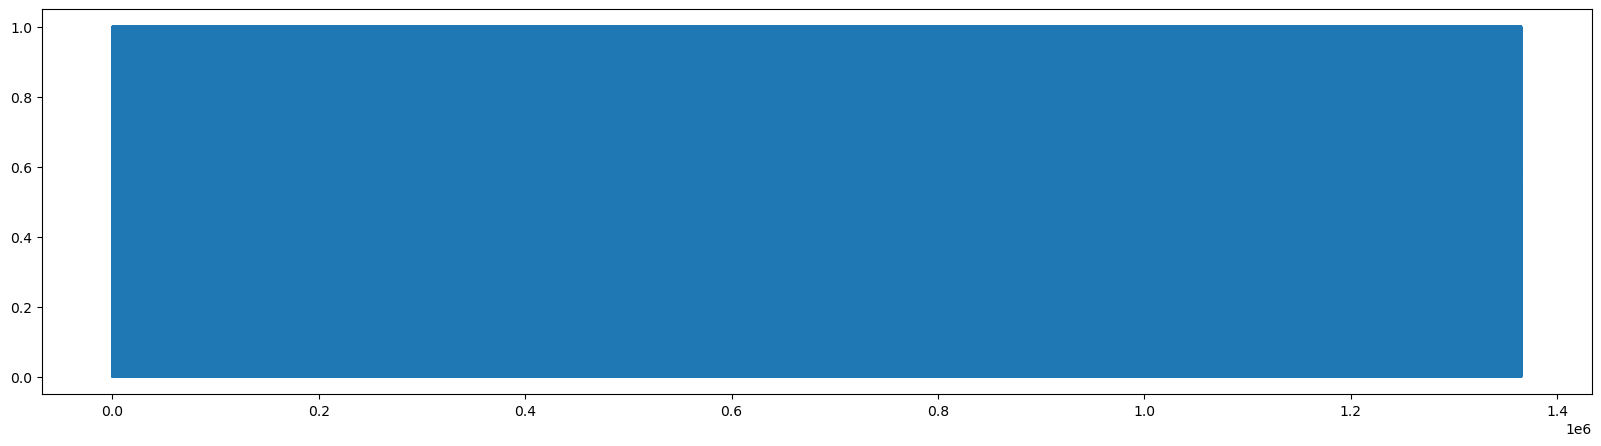

In [ ]:
data['attack'].plot(figsize=(20,5))

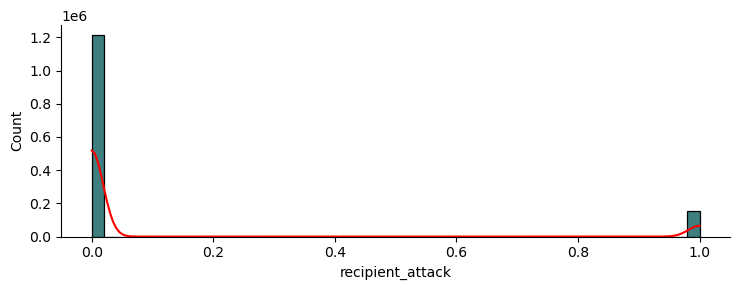

In [ ]:
sns.displot(data=data, x="recipient_attack", kde=True, bins = 50,color = "red", facecolor = "#3F7F7F",height = 3, aspect = 2.5);

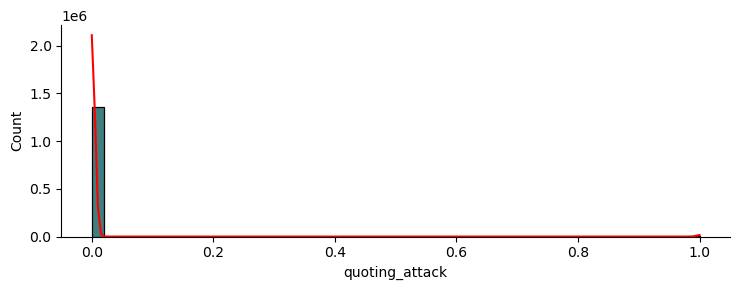

In [ ]:
sns.displot(data=data, x="quoting_attack", kde=True, bins = 50,color = "red", facecolor = "#3F7F7F",height = 3, aspect = 2.5);

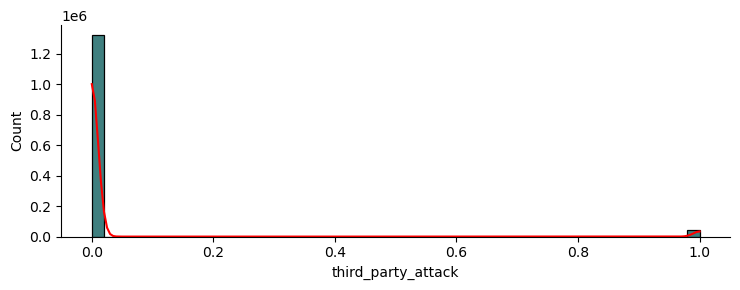

In [ ]:
sns.displot(data=data, x="third_party_attack", kde=True, bins = 50,color = "red", facecolor = "#3F7F7F",height = 3, aspect = 2.5);

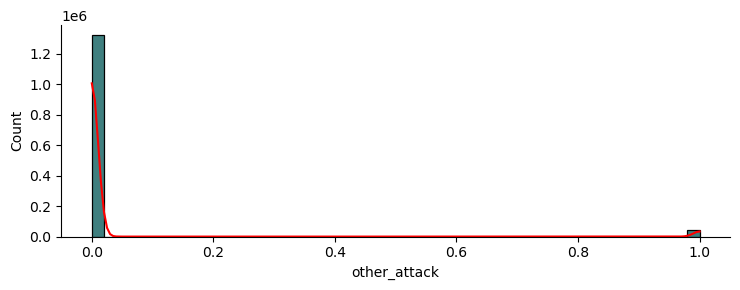

In [ ]:
sns.displot(data=data, x="other_attack", kde=True, bins = 50,color = "red", facecolor = "#3F7F7F",height = 3, aspect = 2.5);

In [ ]:
plt.figure(figsize=(16,16))

year=["2008"]

plt.subplot(411)
sns.lineplot(data[data["quoting_attack"].isin(year)].rev_id, label="quoting_attack",color='green');
plt.title("quoting_attack: {}".format(rev_id[199507660]) )

plt.subplot(412)
sns.lineplot(data[data["recipient_attack"].isin(year)].rev, label="recipient_attack",color='green');
plt.title("recipient_attack : {}" .format(rev_id[199507660]))

plt.tight_layout()
plt.show()

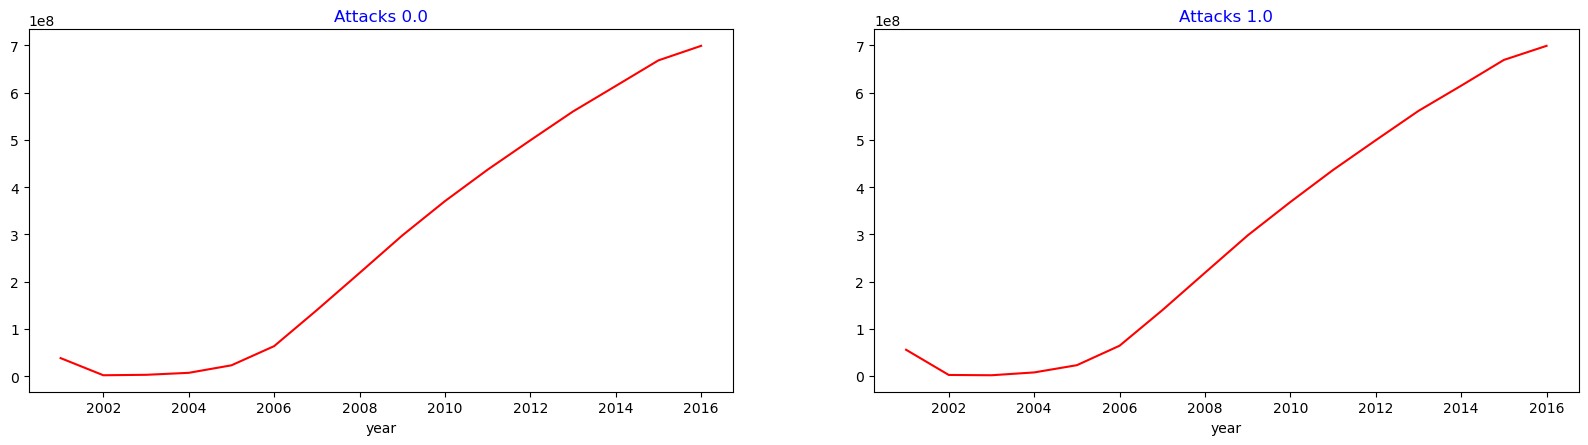

In [ ]:
solar_irradiation = data.pivot_table(values='rev_id', index='year', columns='attack')

def Daywise_plot(data= None, row = None, col = None, title='Attacks'):
    cols = data.columns # take all column
    gp = plt.figure(figsize=(20,40))

    gp.subplots_adjust(wspace=0.2, hspace=0.5)
    for i in range(1, len(cols)+1):
        ax = gp.add_subplot(row,col, i)
        data[cols[i-1]].plot(ax=ax, color='red')
        ax.set_title('{} {}'.format(title, cols[i-1]),color='blue')

Daywise_plot(data=solar_irradiation, row=6, col=2)

In [ ]:
data['attack'].nunique()

2

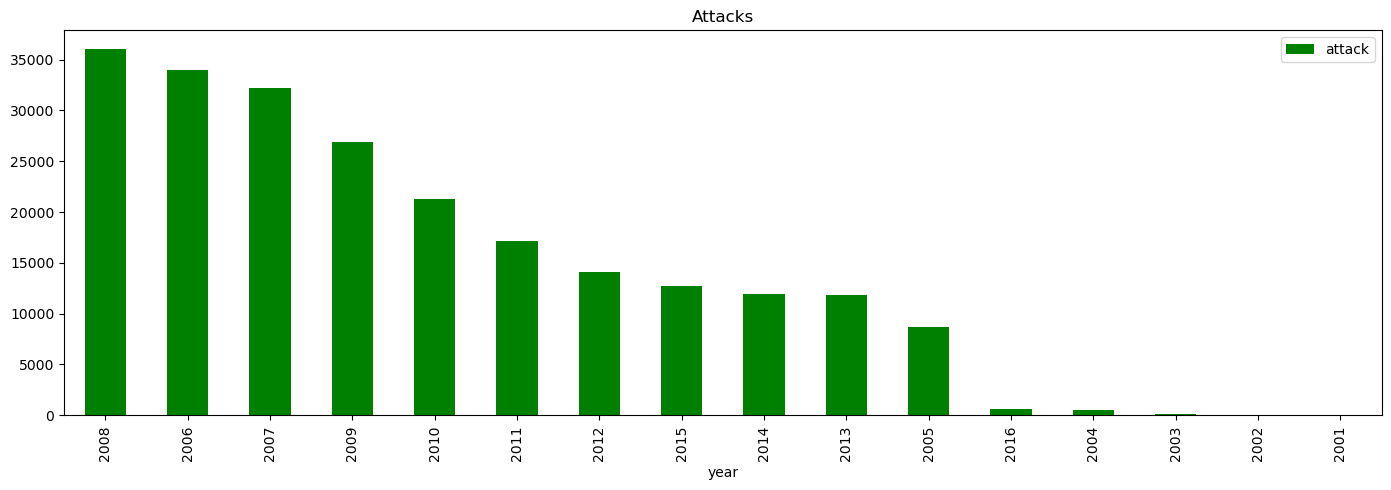

In [ ]:
daily_irradiation = data.groupby('year')['attack'].agg('sum')

daily_irradiation.sort_values(ascending=False).plot.bar(figsize=(17,5), legend=True,color='green')
plt.title('Attacks')
plt.show()

In [ ]:
sns.lmplot(y="attack",x="year",hue="year",col="year",height=3,col_wrap=4,data=data,fit_reg=True);

visualized data